In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Setup the Pose function for videos - for video processing.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.3,
                          min_tracking_confidence=0.5)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

In [14]:
def detectPose(image_pose, pose, draw=False, display=False):
    original_image = image_pose.copy()
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:
        mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=2, circle_radius=3),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,135,235),
                                                                                 thickness=2, circle_radius=2))
        if display:
            plt.figure(figsize=[18,12])
            plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Kid's first pitch");plt.axis('off'); 
            plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("HomeRunHero - AI assistant detecting pose ");plt.axis('off');
        else:
            return original_image, results

# Image 

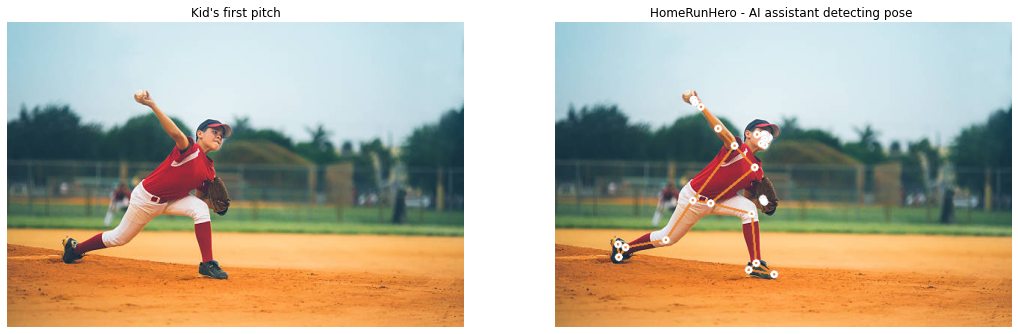

In [15]:
# Read image
image_path = 'pitch_kid.jpeg' # Pitching.jpeg, batter.jpg
output = cv2.imread(image_path)
detectPose(output, pose_image, draw=True, display=True)

# Video 

In [16]:
# video input 
cap = cv2.VideoCapture('How to Pitch a Baseball _ Baseball Pitching (online-video-cutter.mp4')

# Initialize video writer object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_video.mp4', fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))

# Read video frame-by-frame and apply pose detection
while(cap.isOpened()):
    ret, frame = cap.read()

    if not ret:
        print("Unable to read frame")
        break

        # Call detectPose function on frame
        detected_image, results = detectPose(frame, pose_video, draw=True, display=False)

        # Write output frame to new video file
        out.write(detected_image)

    # Display the resulting frame
    cv2.imshow('Frame', detected_image)

    # Press Q on keyboard to exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break

cap.release()
cv2.destroyAllWindows()

In [7]:
# Release video capture and writer objects
# out.release()
# Closes all the frames